<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 171.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 175.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 168.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 167.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 164.7 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-18 10:06:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  68.7MB/s    in 2.2s    

2025-03-18 10:06:42 (68.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data


In [4]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [5]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [6]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

65437

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



<Figure size 1000x600 with 0 Axes>

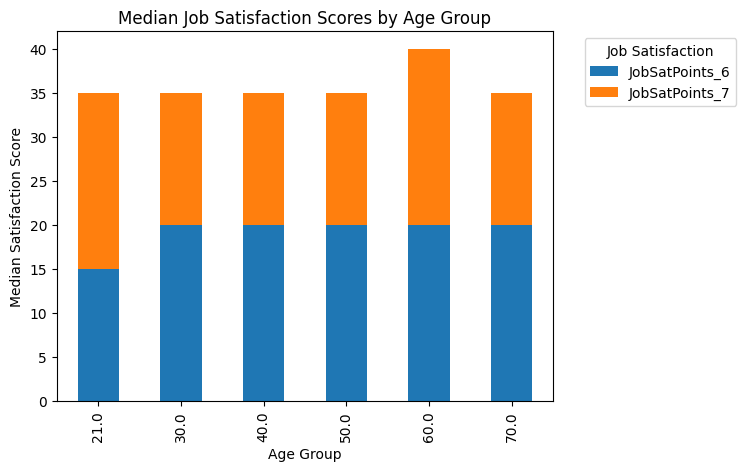

In [7]:
# Create a query to convert Age to numeric and remove missing values in JobSatPoints_6 and JobSatPoints_7
QUERY = """
SELECT *,
    CASE Age
        WHEN 'Under 18' THEN 17
        WHEN '18-24 years old' THEN 21
        WHEN '25-34 years old' THEN 30
        WHEN '35-44 years old' THEN 40
        WHEN '45-54 years old' THEN 50
        WHEN '55-64 years old' THEN 60
        WHEN '65 years or older' THEN 70
        ELSE NULL
    END AS Age_numeric
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL;
"""

df_numeric = pd.read_sql_query(QUERY, conn)


# Create the plot
plt.figure(figsize=(10, 6))
df_numeric.groupby('Age_numeric')[['JobSatPoints_6', 'JobSatPoints_7']].median().plot(kind='bar', stacked=True)
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='Job Satisfaction', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. 
This will show how satisfaction varies by employment type.


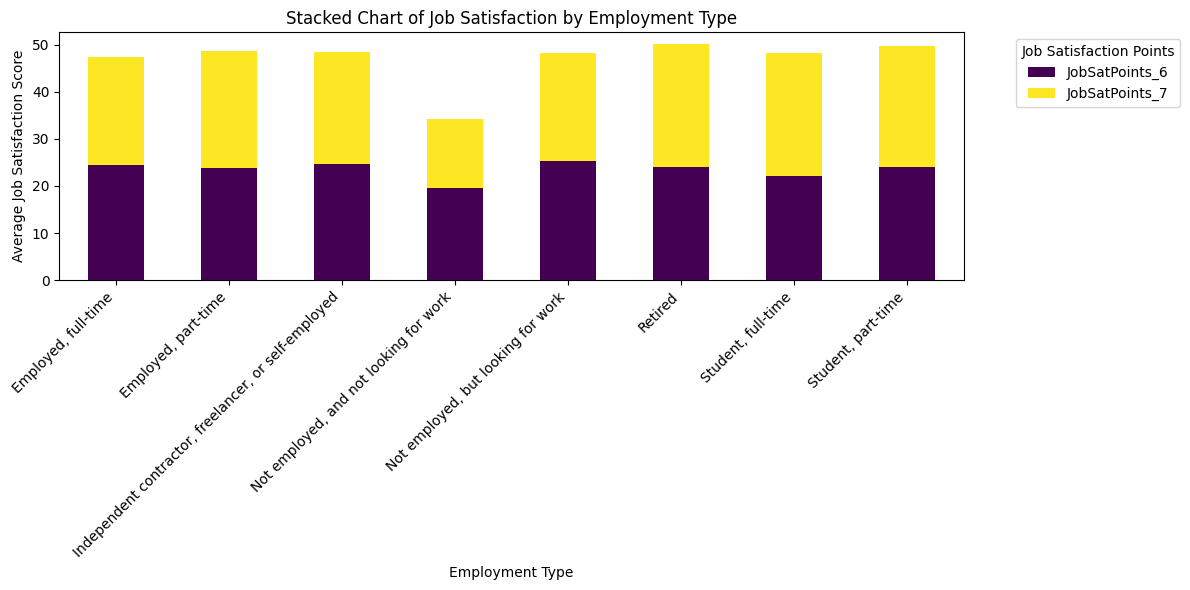

In [8]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to transform job satisfaction and split employment type
QUERY = """
WITH RECURSIVE split_employment AS (
    -- Base case: First split of Employment
    SELECT 
        JobSatPoints_6,
        JobSatPoints_7,
        TRIM(SUBSTR(Employment, 1, INSTR(Employment || ';', ';') - 1)) AS Employment_Split,
        SUBSTR(Employment, INSTR(Employment || ';', ';') + 1) AS Remaining,
        1 AS level
    FROM main
    WHERE JobSatPoints_6 IS NOT NULL 
          AND JobSatPoints_7 IS NOT NULL
          AND Employment IS NOT NULL

    UNION ALL

    -- Recursive case: Continue splitting until no ';' left
    SELECT 
        JobSatPoints_6, 
        JobSatPoints_7,
        TRIM(SUBSTR(Remaining, 1, INSTR(Remaining || ';', ';') - 1)) AS Employment_Split, 
        SUBSTR(Remaining, INSTR(Remaining || ';', ';') + 1),
        level + 1
    FROM split_employment
    WHERE LENGTH(Remaining) > 0 AND level < 10  -- Prevent infinite loops
)
SELECT JobSatPoints_6, JobSatPoints_7, Employment_Split
FROM split_employment
WHERE Employment_Split IS NOT NULL;

"""

# Execute the query and load the result into a DataFrame
df_employment = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Create a frequency table by job satisfaction and employment type
df_freq = df_employment.groupby("Employment_Split")[["JobSatPoints_6", "JobSatPoints_7"]].mean().reset_index()

#create the plot
df_freq.set_index("Employment_Split").plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

plt.xlabel("Employment Type")
plt.ylabel("Average Job Satisfaction Score")
plt.title("Stacked Chart of Job Satisfaction by Employment Type")
plt.legend(title="Job Satisfaction Points", bbox_to_anchor=(1.05, 1), loc="upper left")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()







### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


<Figure size 1600x1600 with 0 Axes>

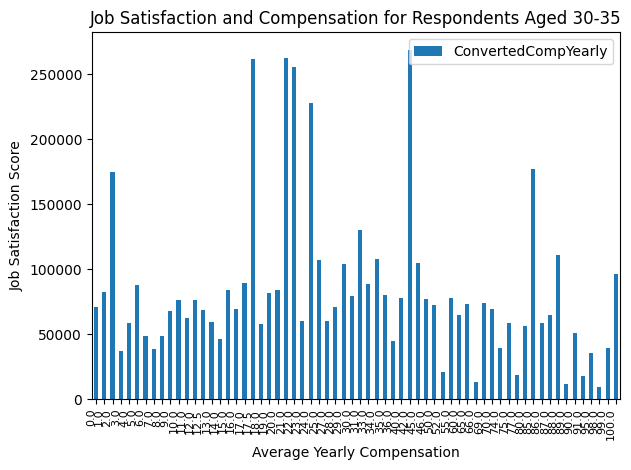

In [9]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a query to convert Age to numeric and remove missing values in JobSatPoints_6 and ConvertedCompYearly
QUERY = """
SELECT *,
    CASE Age
        WHEN 'Under 18' THEN 17
        WHEN '18-24 years old' THEN 21
        WHEN '25-34 years old' THEN 30
        WHEN '35-44 years old' THEN 40
        WHEN '45-54 years old' THEN 50
        WHEN '55-64 years old' THEN 60
        WHEN '65 years or older' THEN 70
        ELSE NULL
    END AS Age_numeric
FROM main
WHERE JobSatPoints_6 IS NOT NULL 
    AND ConvertedCompYearly IS NOT NULL
    AND Age_numeric BETWEEN 30 AND 35;
"""

df_numeric30_35 = pd.read_sql_query(QUERY, conn)

#Create the plot
plt.figure(figsize=(16, 16))
df_numeric30_35.groupby('JobSatPoints_6')[['ConvertedCompYearly']].mean().plot(kind='bar', stacked=True)
plt.title('Job Satisfaction and Compensation for Respondents Aged 30-35')
plt.ylabel('Job Satisfaction Score')
plt.xlabel('Average Yearly Compensation')
plt.xticks(rotation=90, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

# Close the connection when you're done
conn.close()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


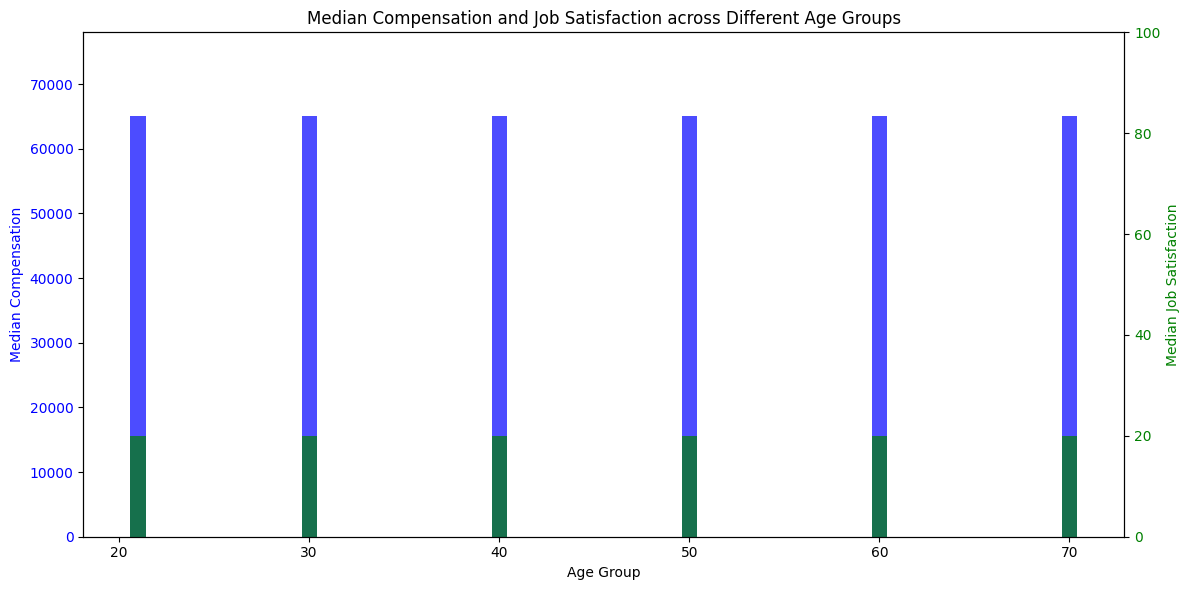

In [10]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get the median compensation and job satisfaction
QUERY = """
SELECT 
    CASE 
        WHEN Age = 'Under 18' THEN 17
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 30
        WHEN Age = '35-44 years old' THEN 40
        WHEN Age = '45-54 years old' THEN 50
        WHEN Age = '55-64 years old' THEN 60
        WHEN Age = '65 years or older' THEN 70
        ELSE NULL
    END AS Age_numeric,

    (SELECT AVG(median_values) AS MedianCompensation
    FROM (
        SELECT ConvertedCompYearly AS median_values,
               ROW_NUMBER() OVER (ORDER BY ConvertedCompYearly) AS row_num,
               COUNT(*) OVER () AS total_rows
        FROM main
        WHERE ConvertedCompYearly IS NOT NULL
    ) AS subquery
    WHERE row_num IN ((total_rows + 1) / 2, (total_rows + 2) / 2)) AS MedianCompensation,

    (SELECT AVG(median_values) AS MedianJobSatisfaction
    FROM (
        SELECT JobSatPoints_6 AS median_values,
               ROW_NUMBER() OVER (ORDER BY JobSatPoints_6) AS row_num,
               COUNT(*) OVER () AS total_rows
        FROM main
        WHERE JobSatPoints_6 IS NOT NULL
    ) AS subquery
    WHERE row_num IN ((total_rows + 1) / 2, (total_rows + 2) / 2)) AS MedianJobSatisfaction

FROM main
WHERE Age IS NOT NULL
GROUP BY Age_numeric;
"""

# Execute the query and load the result into a pandas DataFrame
df_medians = pd.read_sql_query(QUERY, conn)

# Close the connection when you're done
conn.close()

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Median Compensation on the left y-axis
ax1.bar(df_medians['Age_numeric'], df_medians['MedianCompensation'], color='b', alpha=0.7, label='Median Compensation')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Median Compensation', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot Median Job Satisfaction
ax2 = ax1.twinx()
ax2.bar(df_medians['Age_numeric'], df_medians['MedianJobSatisfaction'], color='g', alpha=0.7, label='Median Job Satisfaction')
ax2.set_ylabel('Median Job Satisfaction', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and display the legend
plt.title('Median Compensation and Job Satisfaction across Different Age Groups')

# Adjust the limits to make sure bars are visible (separately scale both axes)
ax1.set_ylim([0, df_medians['MedianCompensation'].max() * 1.2])
ax2.set_ylim([0, 100])  # Assuming JobSatPoints_6 values are between 0 and 100


# Show the plot
plt.tight_layout()
plt.show()

    



### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


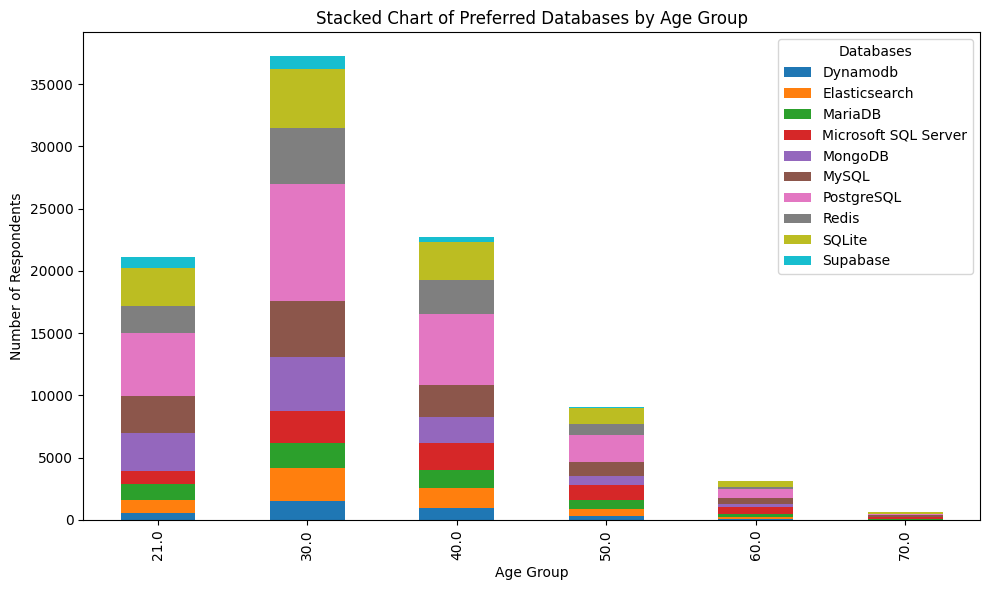

In [11]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to transform age into numerical values, drop missing values and split databases
QUERY = """
WITH RECURSIVE split_databases AS (
    -- Base case: First split of DatabasesWantToWorkWith
    SELECT 
        CASE 
            WHEN Age = 'Under 18' THEN 17
            WHEN Age = '18-24 years old' THEN 21
            WHEN Age = '25-34 years old' THEN 30
            WHEN Age = '35-44 years old' THEN 40
            WHEN Age = '45-54 years old' THEN 50
            WHEN Age = '55-64 years old' THEN 60
            WHEN Age = '65 years or older' THEN 70
            ELSE NULL
        END AS Age_numeric,
        TRIM(SUBSTR(DatabaseWantToWorkWith, 1, INSTR(DatabaseWantToWorkWith || ';', ';') - 1)) AS Database_Split,
        SUBSTR(DatabaseWantToWorkWith, INSTR(DatabaseWantToWorkWith || ';', ';') + 1) AS Remaining,
        1 AS level
    FROM main
    WHERE DatabaseWantToWorkWith IS NOT NULL

    UNION ALL

    SELECT 
        Age_numeric, 
        TRIM(SUBSTR(Remaining, 1, INSTR(Remaining || ';', ';') - 1)) AS Database_Split, 
        SUBSTR(Remaining, INSTR(Remaining || ';', ';') + 1),
        level + 1
    FROM split_databases
    WHERE LENGTH(Remaining) > 0 AND level < 10  -- Prevent infinite loops
)
SELECT Age_numeric, Database_Split
FROM split_databases
WHERE Database_Split IS NOT NULL;
"""

# Execute the query and load the result into a new DataFrame
df_dbprefer = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Get the top 10 most frequent databases
top_databases = df_dbprefer['Database_Split'].value_counts().nlargest(10).index

# Create a frequency table by age group and database
age_db_counts = df_dbprefer[df_dbprefer['Database_Split'].isin(top_databases)] \
    .groupby(['Age_numeric', 'Database_Split']).size().unstack(fill_value=0)

# Plot a stacked chart
age_db_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Chart of Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Databases')

plt.tight_layout()
plt.show()





##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


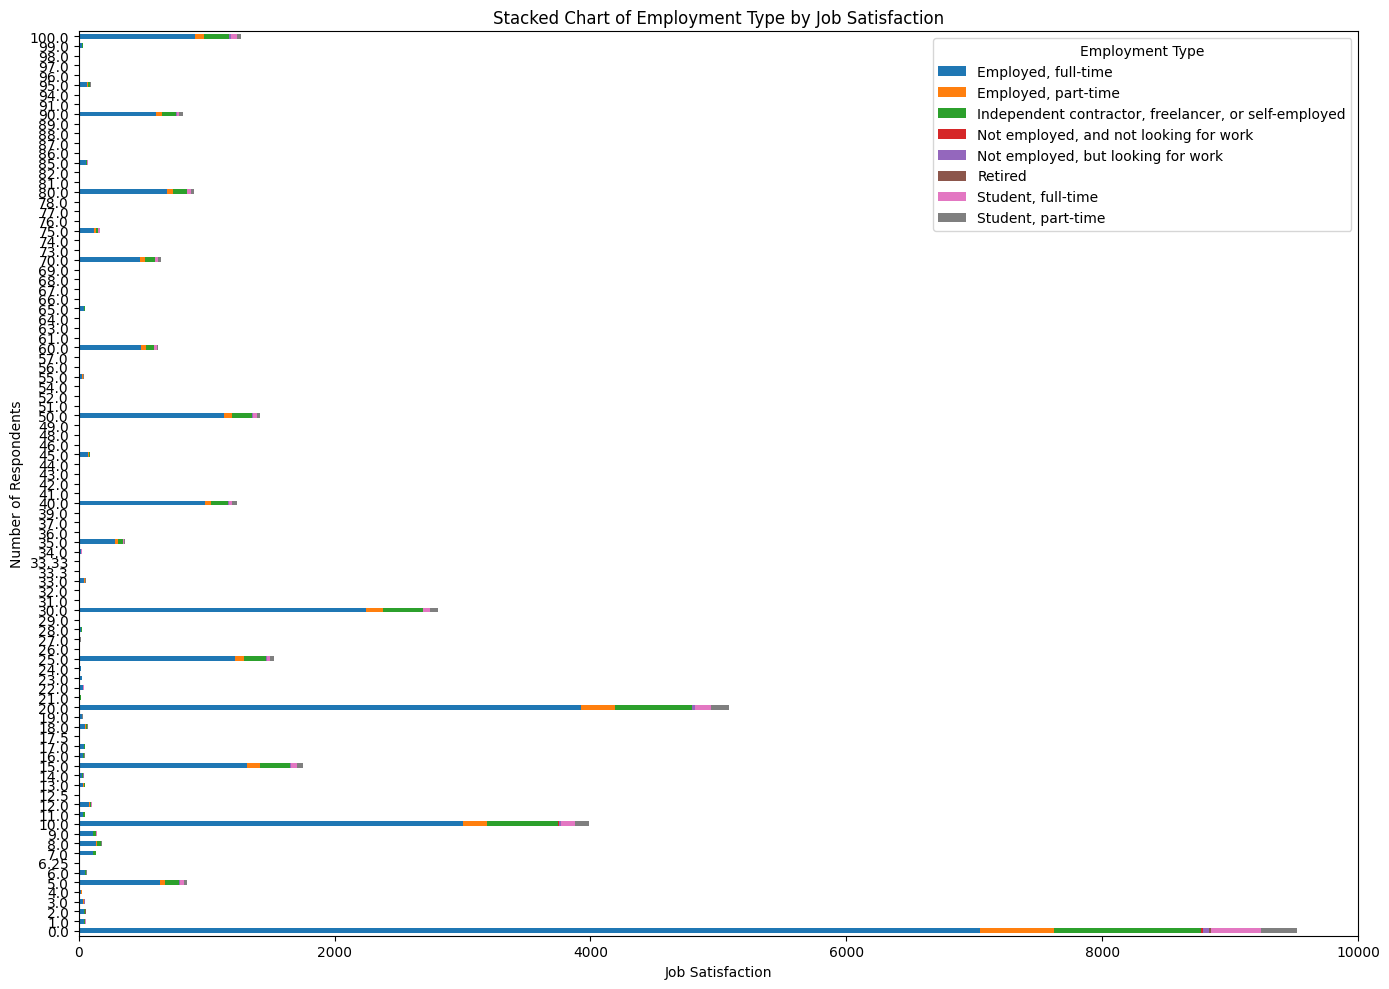

In [12]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to transform job satisfaction and split employment type
QUERY = """
WITH RECURSIVE split_employment AS (
    -- Base case: First split of Employment
    SELECT 
        JobSatPoints_6, 
        SUBSTR(Employment, 1, INSTR(Employment || ';', ';') - 1) AS Employment_Split,
        SUBSTR(Employment, INSTR(Employment || ';', ';') + 1) AS Remaining,
        1 AS level
    FROM main
    WHERE JobSatPoints_6 IS NOT NULL AND Employment IS NOT NULL

    UNION ALL

    -- Recursive case: Continue splitting until no ';' left
    SELECT 
        JobSatPoints_6, 
        SUBSTR(Remaining, 1, INSTR(Remaining || ';', ';') - 1) AS Employment_Split, 
        SUBSTR(Remaining, INSTR(Remaining || ';', ';') + 1),
        level + 1
    FROM split_employment
    WHERE LENGTH(Remaining) > 0 AND level < 10  -- Prevent infinite loops
)
SELECT JobSatPoints_6, Employment_Split 
FROM split_employment
WHERE Employment_Split IS NOT NULL;
"""

# Execute the query and load the result into a DataFrame
df_employment_sat = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Create a frequency table by job satisfaction and employment type
job_satisfaction_employment = df_employment_sat.groupby(['JobSatPoints_6', 'Employment_Split']).size().unstack(fill_value=0)

# Plot a stacked chart
job_satisfaction_employment.plot(kind='barh', stacked=True, figsize=(14, 10))

plt.title('Stacked Chart of Employment Type by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Type')

plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_703/2654222472.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


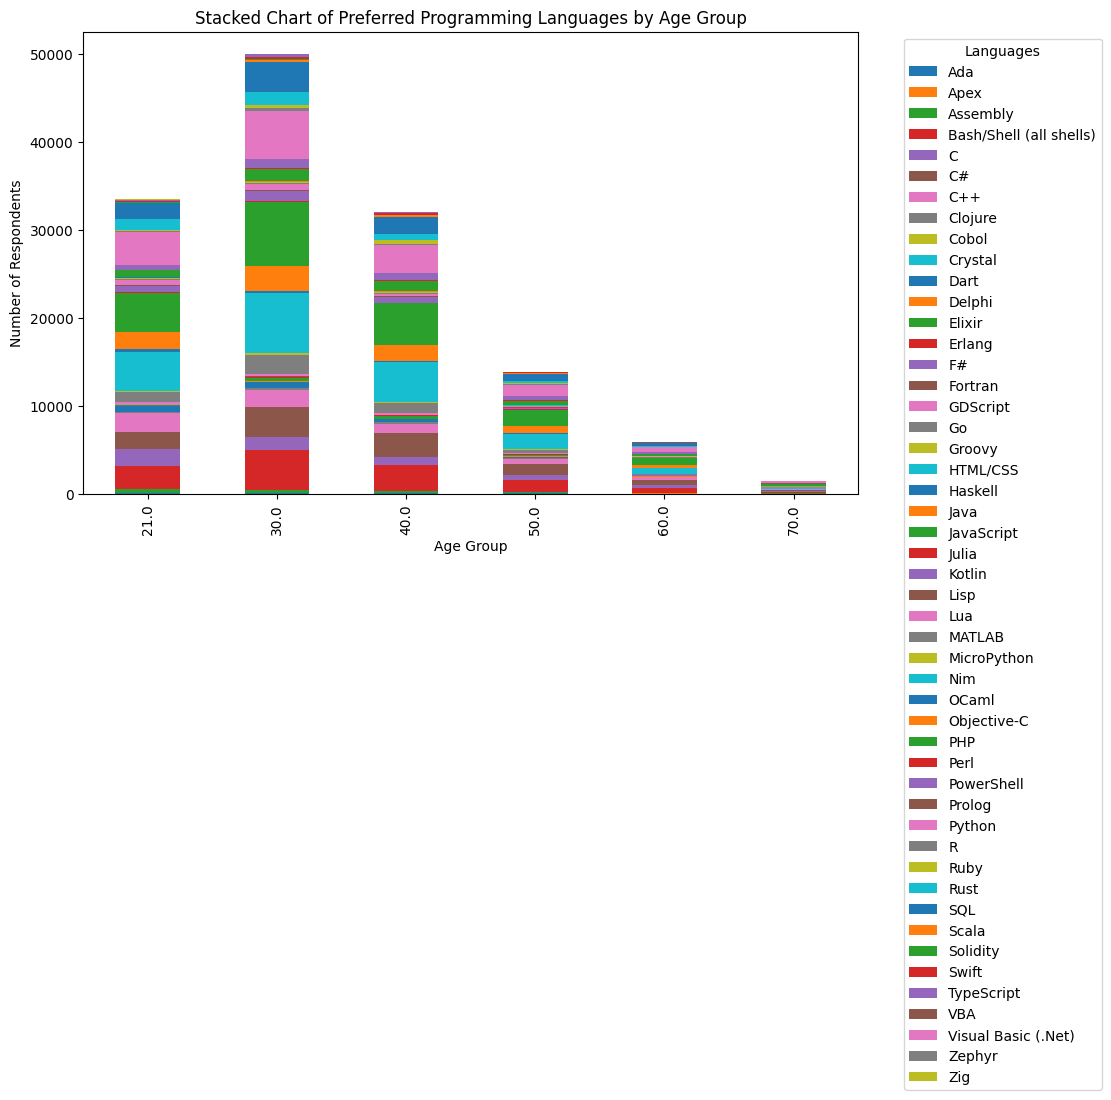

In [13]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to transform age into numerical values, drop missing values and split languages
QUERY = """
WITH RECURSIVE split_language AS (
    -- Base case: First split of LanguageAdmired
    SELECT 
        CASE 
            WHEN Age = 'Under 18' THEN 17
            WHEN Age = '18-24 years old' THEN 21
            WHEN Age = '25-34 years old' THEN 30
            WHEN Age = '35-44 years old' THEN 40
            WHEN Age = '45-54 years old' THEN 50
            WHEN Age = '55-64 years old' THEN 60
            WHEN Age = '65 years or older' THEN 70
            ELSE NULL
        END AS Age_numeric,
        TRIM(SUBSTR(LanguageAdmired, 1, INSTR(LanguageAdmired || ';', ';') - 1)) AS Language_Split,
        SUBSTR(LanguageAdmired, INSTR(LanguageAdmired || ';', ';') + 1) AS Remaining,
        1 AS level
    FROM main
    WHERE LanguageAdmired IS NOT NULL

    UNION ALL

    -- Recursive case: Continue splitting until no ';' left
    SELECT 
        Age_numeric, 
        TRIM(SUBSTR(Remaining, 1, INSTR(Remaining || ';', ';') - 1)) AS Language_Split, 
        SUBSTR(Remaining, INSTR(Remaining || ';', ';') + 1),
        level + 1
    FROM split_language
    WHERE LENGTH(Remaining) > 0 AND Remaining LIKE '%;%' AND level < 10
)
SELECT Age_numeric, TRIM(Language_Split) AS Language_Split
FROM split_language
WHERE Language_Split IS NOT NULL AND Language_Split != '';
"""

# Execute the query and load the result into a new DataFrame
df_admired = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Create a frequency table by age group and database
age_language_counts = df_admired.groupby(['Age_numeric', 'Language_Split']).size().unstack(fill_value=0)

# Plot a stacked chart
age_language_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Chart of Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [14]:
# I had some issues with Kernel because of the volume of data, so I will split it into 3 parts.

# First part: Splitting Employment data
QUERY_Employment = """
WITH RECURSIVE split_employment AS (
    SELECT 
        SUBSTR(Employment, 1, INSTR(Employment || ';', ';') - 1) AS Employment_Split,
        SUBSTR(Employment, INSTR(Employment || ';', ';') + 1) AS Remaining_Employment,
        1 AS level
    FROM main
    WHERE Employment IS NOT NULL
    UNION ALL
    SELECT 
        SUBSTR(Remaining_Employment, 1, INSTR(Remaining_Employment || ';', ';') - 1) AS Employment_Split,
        SUBSTR(Remaining_Employment, INSTR(Remaining_Employment || ';', ';') + 1),
        level + 1
    FROM split_employment
    WHERE LENGTH(Remaining_Employment) > 0 AND Remaining_Employment LIKE '%;%' AND level < 10
)
SELECT Employment_Split 
FROM split_employment
WHERE Employment_Split IS NOT NULL;
"""

# Execute and load the result for Employment
conn = sqlite3.connect('survey-data.sqlite')
df_employment = pd.read_sql_query(QUERY_Employment, conn)
conn.close()







In [17]:
# Second part: Splitting PlatformAdmired data
QUERY_Platform = """
WITH RECURSIVE split_platform AS (
    SELECT 
        TRIM(SUBSTR(PlatformAdmired, 1, INSTR(PlatformAdmired || ';', ';') - 1)) AS Platform_Split,
        SUBSTR(PlatformAdmired, INSTR(PlatformAdmired || ';', ';') + 1) AS Remaining_Platform,
        1 AS level
    FROM main
    WHERE PlatformAdmired IS NOT NULL
    UNION ALL
    SELECT 
        TRIM(SUBSTR(Remaining_Platform, 1, INSTR(Remaining_Platform || ';', ';') - 1)) AS Platform_Split,
        SUBSTR(Remaining_Platform, INSTR(Remaining_Platform || ';', ';') + 1),
        level + 1
    FROM split_platform
    WHERE LENGTH(Remaining_Platform) > 0 AND Remaining_Platform LIKE '%;%' AND level < 10
)
SELECT Platform_Split 
FROM split_platform
WHERE Platform_Split IS NOT NULL;
"""

# Execute and load the result for PlatformAdmired
conn = sqlite3.connect('survey-data.sqlite')
df_platform = pd.read_sql_query(QUERY_Platform, conn)
conn.close()

# Third part: Combine both Employment and Platform data into a single DataFrame
df_technology_adoption = pd.merge(df_employment, df_platform, left_index=True, right_index=True)

# Check the first few rows of the combined DataFrame
print(df_technology_adoption.value_counts())

Employment_Split     Platform_Split                   
Employed, full-time  Amazon Web Services (AWS)            9651
                     Microsoft Azure                      3411
                     Google Cloud                         3084
                     Cloudflare                           2971
                     Firebase                             2154
                                                          ... 
Retired              VMware                                  1
                     Oracle Cloud Infrastructure (OCI)       1
                     OpenStack                               1
Student, part-time   IBM Cloud Or Watson                     1
                     PythonAnywhere                          1
Name: count, Length: 235, dtype: int64


<Figure size 1400x1000 with 0 Axes>

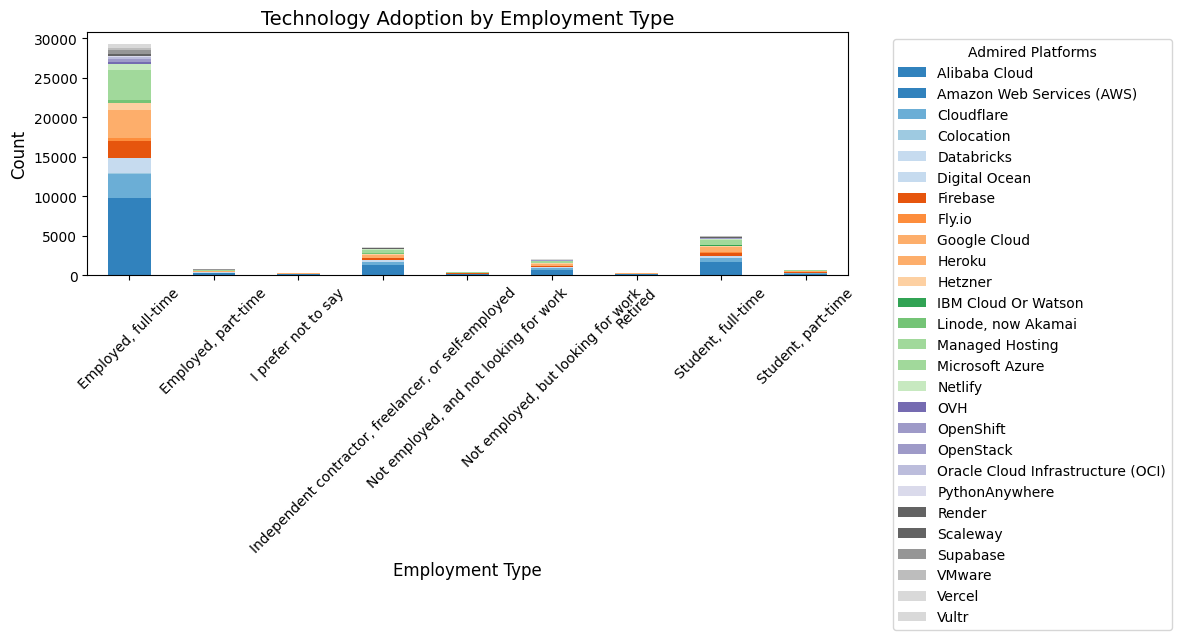

In [21]:
# Create the plot
pivot_df = df_technology_adoption.pivot_table(index='Employment_Split', columns='Platform_Split', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 10))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(12, 6))
plt.title('Technology Adoption by Employment Type', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Admired Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
